<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/svm_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サポートベクターマシン(SVM)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## データ作成

In [ ]:
def gen_data():
    # random.normal 標準正規分布N(0,1)
    # reshape(行数, 列数) 行列作成 -1はお任せ
    sample_size=100
    # x0,x1はどちらも行数sample_size/2，列数2の行列
    x0 = np.random.normal(size=sample_size).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=sample_size).reshape(-1, 2) + 2.
    # X_trainは行数sample_size，列数2の行列
    X_train = np.concatenate([x0, x1])
    # np.zeros(数値)：ゼロを横に数値個並べてね。
    # ys_trainは要素数sample_sizeのベクトル。
    ys_train = np.concatenate([np.zeros(int(sample_size/2)), np.ones(int(sample_size/2))]).astype(np.int)
    return X_train, ys_train

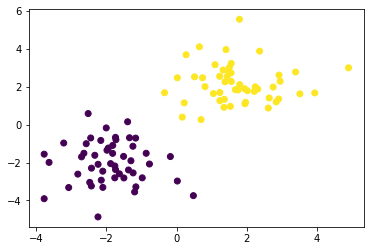

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# print(X_train[:, 0])

## 学習

In [ ]:
# ys_trainの要素をwhereで置換したものをべクトルt_に代入
t_ = np.where(ys_train == 1.0, 1.0, -1.0)

# X_trainは行数sample_size，列数2の行列
# len()はリストの要素数
n_samples = len(X_train)
# .dotは行列の積，.Tは転置
# Kは行数,列数ともにsample_size/2の行列
Kernel = X_train.dot(X_train.T)

eta_01 = 0.01
eta_02 = 0.001
n_iter = 500
# n_iter = 3

# テンソル積 np.outer(t_, t_)の結果は、行数,列数ともにべクトルt_の要素数である行列
H = np.outer(t_, t_) * Kernel
# a_はt_と同じ要素数のベクトル
a_ = np.ones(n_samples)
# 勾配降下法
# アンダーバーはループ変数を省略の時
for _ in range(n_iter):
    # こんなで全要素が1のから引いたことになるんだって
    # .dot(べクトル)やる時、べクトルが縦か横か意識しないで良いみたい
    # grad_はべクトル
    grad_ = 1 - H.dot(a_)
    a_ += eta_01 * grad_
    a_ -= eta_02 * a_.dot(t_) * t_
    a_ = np.where(a_ > 0, a_, 0)

## 予測

In [ ]:
# べクトルa_の要素をboolに置換したべクトルを作りindex_に代入
index_ = a_ > 1e-6
# print(a_)
# print(index_)
# print(index_.shape)

S_vs = X_train[index_]
s_v_t_ = t_[index_]
s_v_a_ = a_[index_]
print(X_train.shape)
print(S_vs)
print(s_v_a_)
print(index_)

# Kernel[index_][:, index_]とKernel[index_, index_]の違い
# Kernel[index_][:, index_]は行数,列数がともにindex_の要素数と一致する行列
# Kernel[index_, index_]はindex_と要素数が同じべクトル
# s_v_a_ * s_v_t_は、べクトルの要素同士の掛け算
term_ = Kernel[index_][:, index_].dot(s_v_a_ * s_v_t_)
# numpy.ndarray.mean()は、配列の要素の平均値を返す。
b = (s_v_t_ - term_).mean()

(100, 2)
[[-1.39660513  0.14938616]
 [ 0.15976967  0.39490914]
 [ 0.69568438  0.26459518]]
[0.2732015  2.1377821  0.32488527]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [ ]:
# 格子点　範囲-5～5に100個の格子点を打つ（両端を含む）
# np.linspace(-5, 5, 100)は要素数100の配列
# Xx0, Xx1はともに100行100列
Xx0, Xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
# np.array([xx0, xx1])は2×100×100の行列
# Xxは10000×2の行列
Xx = np.array([Xx0, Xx1]).reshape(2, -1).T
X_test = Xx
print(X_test)
print(len(X_test))

y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(s_v_a_, s_v_t_, S_vs):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

[[-5.        -5.       ]
 [-4.8989899 -5.       ]
 [-4.7979798 -5.       ]
 ...
 [ 4.7979798  5.       ]
 [ 4.8989899  5.       ]
 [ 5.         5.       ]]
10000


[[-1.39660513  0.14938616]
 [ 0.15976967  0.39490914]
 [ 0.69568438  0.26459518]]


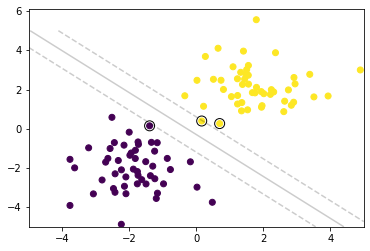

In [ ]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
print(S_vs)
plt.scatter(S_vs[:, 0], S_vs[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# マージンと決定境界を可視化
# contour:等高線, alpha:透過度
plt.contour(Xx0, Xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-.8, 0, .8], alpha=0.2, linestyles=['--', '-', '--'])